In [159]:
import os, shlex
from subprocess import check_output

# go to the root of the repository
repo_rootdir = check_output(shlex.split("git rev-parse --show-toplevel")).strip().decode('ascii')
os.chdir(repo_rootdir)

import os
import sys
sys.path.append("utils")

import torch

from config.config_parser import read_config
from utils.helpers import *

import utils.mesh_operations
device = get_device()

from notebooks.utils_ipywidgets import *
from IPython.display import display

import ipywidgets as widgets

import pyvista as pv
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy
from pprint import pprint

import matplotlib.pyplot as plt

In [160]:
sys.path.append("data")

In [161]:
from get_dosages import get_dosages

In [162]:
kk = get_dosages("data/genotypes/rs11153730.vcf")
kk

{'5436217': 2,
 '4917788': 0,
 '1780889': 2,
 '4132998': 2,
 '5321060': 0,
 '2862266': 0,
 '3720588': 0,
 '5733911': 2,
 '5710035': 1,
 '1441935': 1,
 '3284775': 2,
 '1702791': 0,
 '2500856': 1,
 '2379073': 0,
 '4198035': 2,
 '4151441': 1,
 '4604701': 1,
 '5337280': 0,
 '4080449': 1,
 '3241826': 1,
 '1742793': 0,
 '3488944': 2,
 '2238441': 1,
 '1808560': 0,
 '5246069': 2,
 '5025011': 0,
 '2502928': 0,
 '3111817': 1,
 '1504954': 1,
 '1393884': 1,
 '4384547': 1,
 '2852039': 0,
 '3214128': 2,
 '4683069': 1,
 '5504302': 0,
 '2014746': 2,
 '5138517': 2,
 '1928831': 1,
 '3114064': 2,
 '5061364': 1,
 '3595916': 2,
 '4439058': 1,
 '1480846': 1,
 '1496053': 1,
 '1052192': 0,
 '1200992': 0,
 '4177534': 2,
 '3654339': 1,
 '2708514': 2,
 '2201726': 0,
 '3224625': 0,
 '2665177': 1,
 '1275923': 1,
 '3348503': 0,
 '3296488': 2,
 '4327279': 2,
 '4346823': 1,
 '4557304': 2,
 '2743784': 2,
 '3368591': 1,
 '4230618': 2,
 '2531952': 0,
 '1898825': 1,
 '4496233': 1,
 '4860800': 1,
 '5073239': 1,
 '3018210'

In [309]:
w = select_experiment(); display(w)

Dropdown(description='Experiment:', options=('2020-09-11_02-13-41', '2020-09-30_12-36-43', '2020-09-30_12-36-4…

In [409]:
import ExperimentClass

exp_dir = o1s.path.join("output", w.value)
experiment = ExperimentClass.ComaExperiment(exp_dir)
# experiment.load_model()
experiment.load_z(drop_subset=False, inplace=True)

In [410]:
import numpy as np

In [411]:
z5 = np.array([experiment.z.z2[id] for id in experiment.z.index if experiment.z.subset[id] != "train"])

(array([1.500e+01, 3.260e+02, 2.449e+03, 7.398e+03, 9.912e+03, 5.444e+03,
        1.660e+03, 3.570e+02, 8.100e+01, 5.000e+00]),
 array([-2.2206526 , -1.71092204, -1.20119148, -0.69146092, -0.18173036,
         0.3280002 ,  0.83773076,  1.34746132,  1.85719188,  2.36692244,
         2.876653  ]),
 <BarContainer object of 10 artists>)

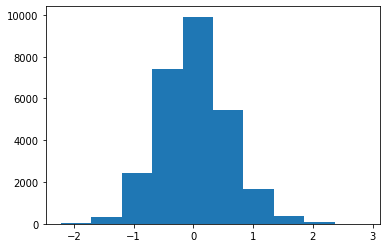

In [412]:
plt.hist(z5)

In [413]:
mean_dosage = np.array([int(x) for x in list(kk.values())]).mean()

In [415]:
dosage = np.array([kk.get(str(id), mean_dosage) for id in experiment.z.z2.index if experiment.z.subset[id] != "train"])

In [416]:
from scipy import stats

In [417]:
corrs = []
pvals = []
N = 1667
for M in range(0, 30000, N):
  corrs.append(stats.spearmanr(z5[M:M+N], dosage[M:M+N])[0])
  pvals.append(stats.spearmanr(z5[M:M+N], dosage[M:M+N])[1])

In [418]:
stats.spearmanr(z5, dosage)

SpearmanrResult(correlation=-0.04899412944991875, pvalue=3.610164009841077e-16)

In [330]:
z5.shape

(27647,)

In [249]:
dosage.shape

(27647,)

In [250]:
dosage

array([1., 0., 1., ..., 1., 2., 0.])

In [251]:
import matplotlib.pyplot as plt

In [252]:
pvals

[0.2128614292486776,
 0.0018448719428827227,
 0.09939702102089511,
 0.9139509752701478,
 0.0027639997998041613,
 0.1946636736772388,
 0.015942741178736293,
 0.10043436340088714,
 0.022932723423321054,
 9.303137334225994e-05,
 0.6505983999022483,
 0.06880150737854092,
 1.545342286745519e-05,
 0.0016762534919919003,
 0.1737364300435156,
 0.01955976512035749,
 0.13852439090396745,
 nan]

(array([1., 1., 0., 2., 4., 9., 2., 6., 0., 3.]), array([-0.15606285, -0.13826874, -0.12047462, -0.10268051, -0.0848864 ,
       -0.06709228, -0.04929817, -0.03150405, -0.01370994,  0.00408418,
        0.02187829]), <BarContainer object of 10 artists>)


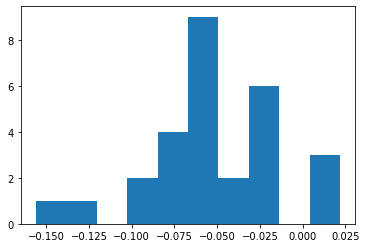

In [245]:
print(plt.hist(corrs))